In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read df

In [2]:
def string_to_list(s):
    """ read strings as lists"""
    if (pd.isna(s)) or (s==''):
        return np.nan 
    
    # Use ast.literal_eval to safely evaluate string representations of lists
    try:
        parsed_list = ast.literal_eval(s)
    except (ValueError, SyntaxError):
        # Fallback in case of any parsing errors
        parsed_list = s.strip('[]').split(',')

    # Strip any extra whitespace and quotes
    return [item.strip().strip('"').strip("'") for item in parsed_list]


In [3]:
df = pd.read_csv('../Input/books_data.csv',
                       converters={
    'authors': string_to_list,
    'categories': string_to_list}
    )
print('shape: ',df.shape)
df.head() 

shape:  (212404, 10)


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,[Julie Strain],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[Comics & Graphic Novels],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,[Philip Nel],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[Biography & Autobiography],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,[David R. Ray],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[Religion],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,[Veronica Haddon],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,[Fiction],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,[Edward Long],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [43]:
df.dtypes

Title             object
description       object
authors           object
image             object
previewLink       object
publisher         object
publishedDate     object
infoLink          object
categories        object
ratingsCount     float64
dtype: object

In [5]:
df.describe(include='object')

# 1. Missing Data Analysis

In [89]:
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100

# Create a dataframe to better visualize missing data
missing_data_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_data_percentage
}).sort_values(by='Missing Values', ascending=False)

# Display missing data summary
print("Missing Data Analysis:")
print(missing_data_df)

Missing Data Analysis:
               Missing Values  Percentage
ratingsCount           162652   76.576712
publisher               75886   35.727199
description             68442   32.222557
image                   52075   24.516958
categories              41199   19.396527
authors                 31413   14.789270
publishedDate           25305   11.913617
previewLink             23836   11.222011
infoLink                23836   11.222011
Title                       1    0.000471


# 2. Duplicate Records

In [45]:
duplicate_records = df.duplicated(subset='Title', keep=False)
duplicate_count = duplicate_records.sum()
# Display the number of duplicate records
print(f"\nNumber of duplicate records: {duplicate_count}")



Number of duplicate records: 0


# 3. Distribution


## ratingsCount

In [100]:
q1 = df['ratingsCount'].quantile(0.25)
q3 = df['ratingsCount'].quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df[(df['ratingsCount'] < lower_bound) | (df['ratingsCount'] > upper_bound)]

# Calculate mean and median
count = df['ratingsCount'].sum()
mean = df['ratingsCount'].mean()
median = df['ratingsCount'].median()

# Print the results
print(f"Sum ratingsCount: {int(count)}")
print(f"Mean of ratingsCount: {mean.round(2)}")
print(f"Median of ratingsCount: {median}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"Number of outliers: {len(outliers)}")

print("ratingsCount IS != FROM DF_RATINGS.SHAPE[0]")

Sum ratingsCount: 1057378
Mean of ratingsCount: 21.25
Median of ratingsCount: 2.0
Q1 (25th percentile): 1.0
Q3 (75th percentile): 5.0
Number of outliers: 6162


## authors

In [92]:
# Exploding the authors list to handle multiple authors per book
df_authors = df.explode('authors')

# Counting the number of books per author
author_counts = df_authors['authors'].value_counts()

# Display the top 10 authors
print("Top 10 Authors by Number of Books:")
print(author_counts.head(20))


Top 10 Authors by Number of Books:
authors
Rose Arny                                236
William Shakespeare                      228
Library of Congress. Copyright Office    178
Agatha Christie                          148
Erle Stanley Gardner                     128
Louis L'Amour                            125
Charles Dickens                          108
Isaac Asimov                              96
Mark Twain                                90
Edgar Rice Burroughs                      89
Rudyard Kipling                           87
Francine Pascal                           84
Various                                   78
Library of Congress                       77
Zane Grey                                 77
Lonely Planet                             75
Robert Louis Stevenson                    74
Ann M. Martin                             74
Henry James                               71
Carolyn Keene                             71
Name: count, dtype: int64


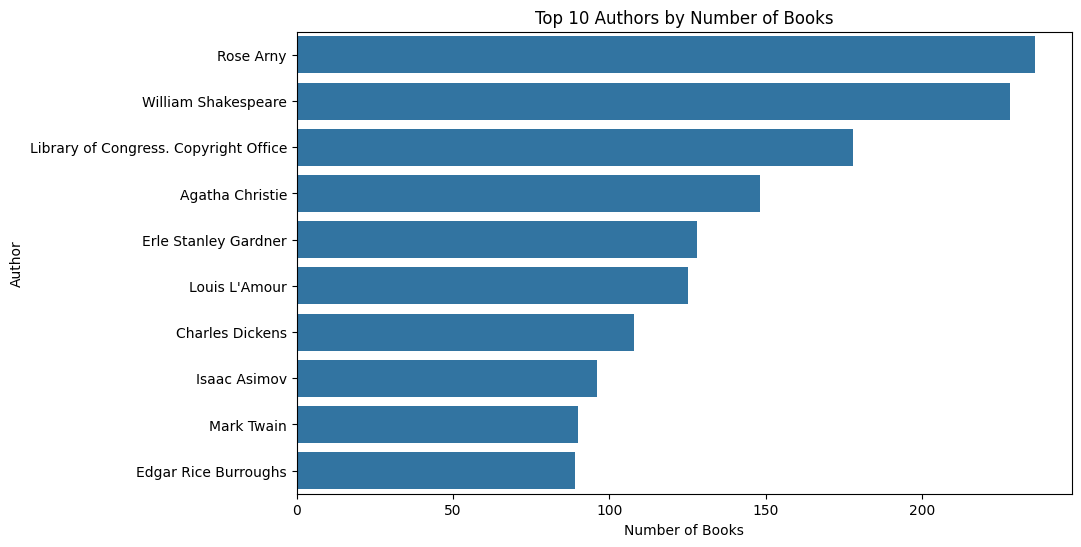

In [94]:
# Top 10 Authors Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=author_counts.head(10).values, y=author_counts.head(10).index)
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

# categories

In [18]:
# Exploding the categories list to handle multiple categories per book
df_categories = df.explode('categories')

# Counting the number of books per category
category_counts = df_categories['categories'].value_counts().head(10)

# Display the top 10 categories
print("\nTop 10 Categories by Number of Books:")
print(category_counts)



Top 10 Categories by Number of Books:
categories
Fiction                      23419
Religion                      9459
History                       9330
Juvenile Fiction              6643
Biography & Autobiography     6324
Business & Economics          5625
Computers                     4312
Social Science                3834
Juvenile Nonfiction           3446
Science                       2623
Name: count, dtype: int64


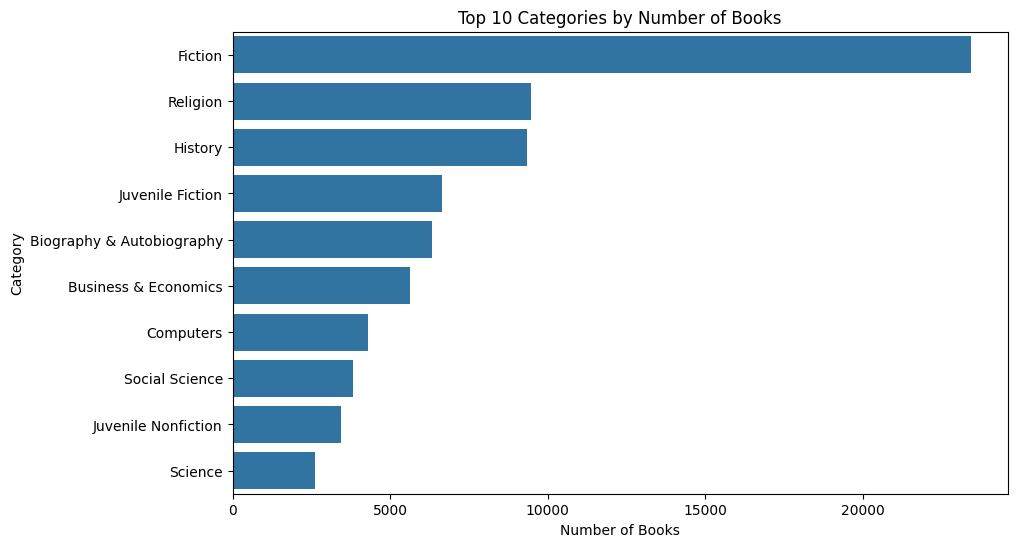

In [19]:
# Top 10 Categories Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.head(10).index)
plt.title('Top 10 Categories by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.show()

## publisher

In [14]:
# Counting the number of books per category
publisher_counts = df['publisher'].value_counts().head(10)

# Display the top 10 publisher
print("\nTop 10 publisher by Number of Books:")
print(publisher_counts)



Top 10 publisher by Number of Books:
publisher
Simon and Schuster            3454
Penguin                       2825
Routledge                     2394
John Wiley & Sons             2031
Harper Collins                1911
Cambridge University Press    1486
Macmillan                     1224
Courier Corporation           1116
Vintage                       1004
Open Road Media                983
Name: count, dtype: int64


#  2 variables

# category publisher

In [22]:
category_counts.index

Index(['Fiction', 'Religion', 'History', 'Juvenile Fiction',
       'Biography & Autobiography', 'Business & Economics', 'Computers',
       'Social Science', 'Juvenile Nonfiction', 'Science'],
      dtype='object', name='categories')

In [24]:
df_categories['categories_grouped'] = df_categories['categories'].apply(lambda x: x if x in category_counts.index else 'Other')


In [25]:
df_categories[df_categories['publisher'].isin(publisher_counts.index)]

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,categories_grouped
26,Paolo Di Canio Hb,Understanding Human Motivation is a lively pre...,[Donald Laming],http://books.google.com/books/content?id=wLQ0b...,http://books.google.nl/books?id=wLQ0bRIyx30C&p...,John Wiley & Sons,2008-04-15,https://play.google.com/store/books/details?id...,Psychology,NaN,Other
28,Ricky Williams: Dreadlocks to Ditka,Ricky Williams is not only the best running ba...,[Steve Richardson],http://books.google.com/books/content?id=7mqCD...,http://books.google.nl/books?id=7mqCDwAAQBAJ&d...,Simon and Schuster,2012-02-07,http://books.google.nl/books?id=7mqCDwAAQBAJ&d...,Sports & Recreation,NaN,Other
39,The New Conspiracy Reader: From Planet X to th...,This book examines a wide array of phenomena t...,[Jeffrey M. Bale],http://books.google.com/books/content?id=mtszD...,http://books.google.nl/books?id=mtszDwAAQBAJ&p...,Routledge,2017-09-04,https://play.google.com/store/books/details?id...,Political Science,NaN,Other
42,Tess and the Highlander,"In 1543, on a windswept isle off of Scotland, ...",[May Mcgoldrick],http://books.google.com/books/content?id=VmCRS...,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,Harper Collins,2002-11,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,Juvenile Fiction,2.0,Juvenile Fiction
47,Building the timber frame house: The revival o...,"For centuries, post-and-beam construction has ...",[Tedd Benson],http://books.google.com/books/content?id=6uxXo...,http://books.google.nl/books?id=6uxXorE4r-UC&p...,Simon and Schuster,1981-09-01,https://play.google.com/store/books/details?id...,Architecture,1.0,Other
...,...,...,...,...,...,...,...,...,...,...,...
212361,Calder Pride,The Long-Awaited Addition to the Beloved Calde...,[Janet Dailey],http://books.google.com/books/content?id=nlsgd...,http://books.google.com/books?id=nlsgd2-kGq4C&...,Harper Collins,2009-03-17,https://play.google.com/store/books/details?id...,Fiction,1.0,Fiction
212368,Dog Talk: Training Your Dog Through A Canine P...,"Explains canine behavior, offers practical adv...","[John Ross, Barbara McKinney]",http://books.google.com/books/content?id=hGjpp...,http://books.google.com/books?id=hGjppYFd9qcC&...,Macmillan,1995-04-15,http://books.google.com/books?id=hGjppYFd9qcC&...,Pets,NaN,Other
212375,Sell and Re-Sell Your Photos,Sell your photos again and again! Live anywher...,"[Rohn Engh, Mikael Karlsson]",http://books.google.com/books/content?id=bKtPE...,http://books.google.com/books?id=bKtPEAAAQBAJ&...,Penguin,2016-08-17,http://books.google.com/books?id=bKtPEAAAQBAJ&...,Photography,NaN,Other
212394,Final things,Grace's father believes in science and builds ...,[Jenny Offill],http://books.google.com/books/content?id=UbSFB...,http://books.google.com/books?id=UbSFBAAAQBAJ&...,Vintage,2015-03-17,https://play.google.com/store/books/details?id...,Fiction,4.0,Fiction


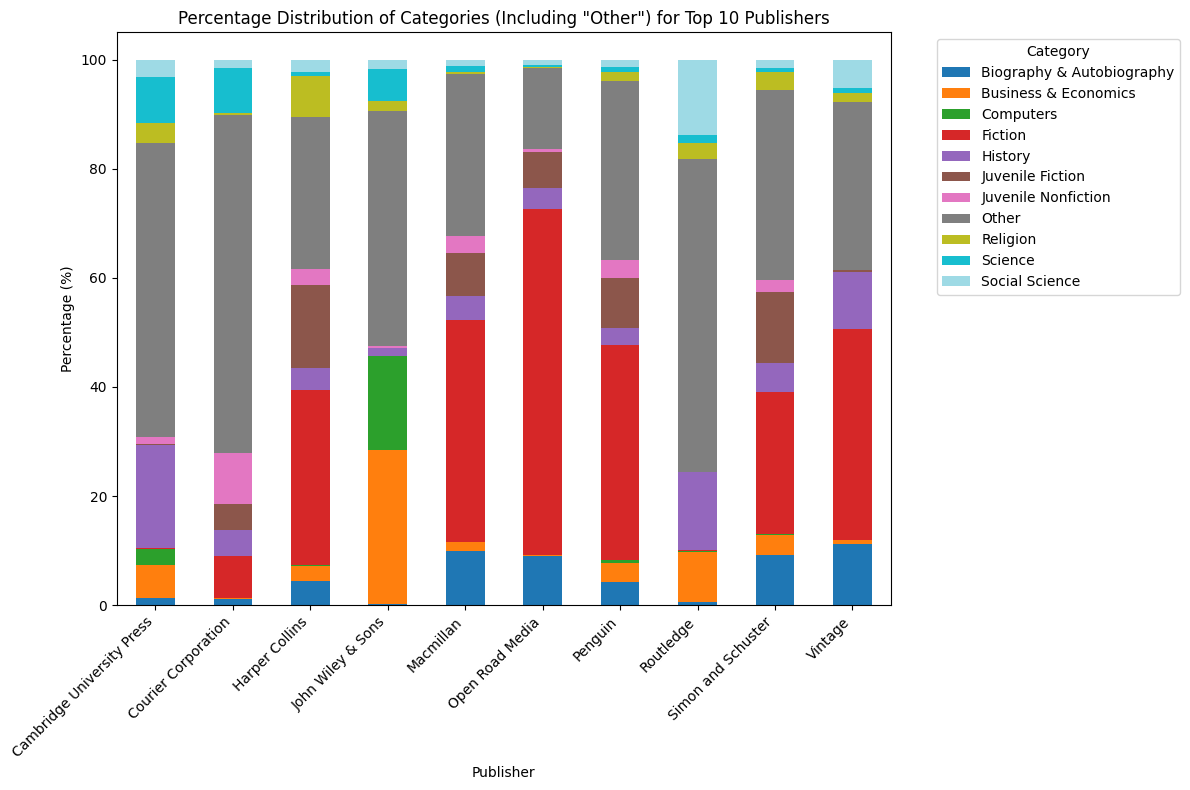

In [27]:


# Filter the dataframe to include only the top 10 publishers
top_publishers_df = df_categories[df_categories['publisher'].isin(publisher_counts.index)]



# Calculate the count of each grouped category for each top publisher
category_distribution = top_publishers_df.groupby(['publisher', 'categories_grouped']).size().unstack(fill_value=0)

category_percentage = category_distribution.div(category_distribution.sum(axis=1), axis=0) * 100


# Plot the percentage distribution using a stacked bar chart
category_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')

plt.title('Percentage Distribution of Categories (Including "Other") for Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Percentage (%)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()
